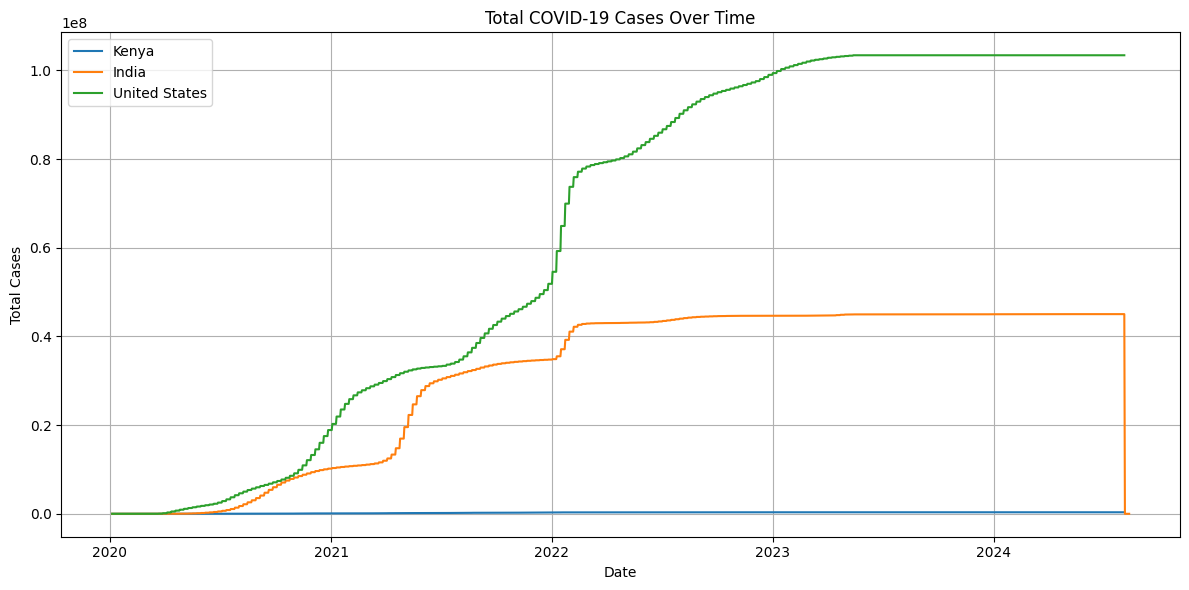

C:\Users\USER\AppData\Local\Temp\ipykernel_1224\2285363559.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


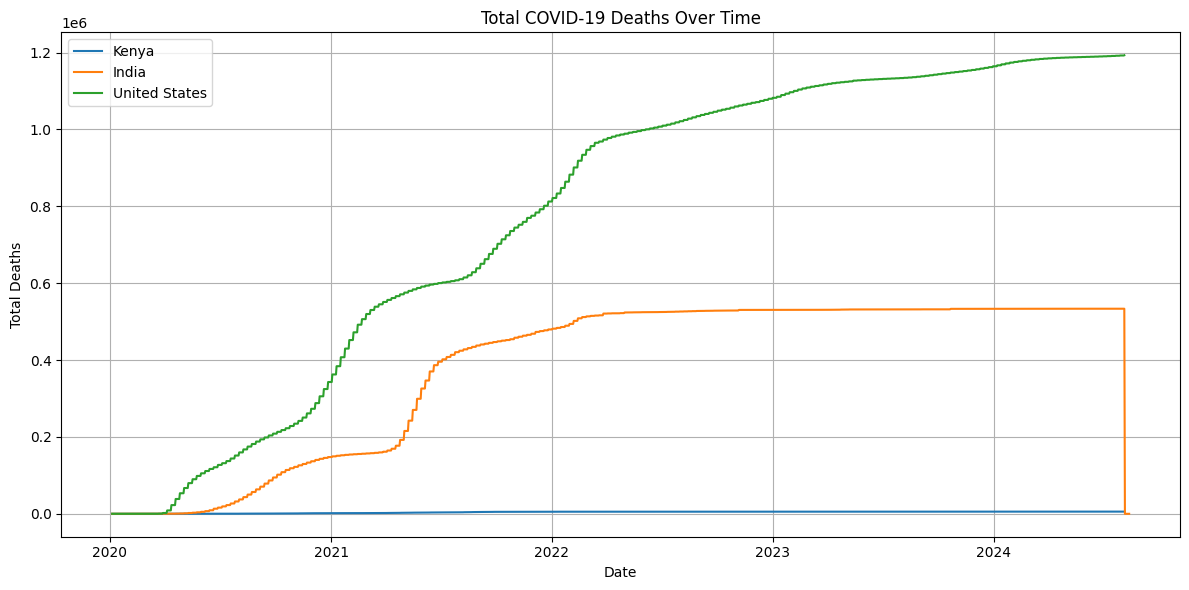

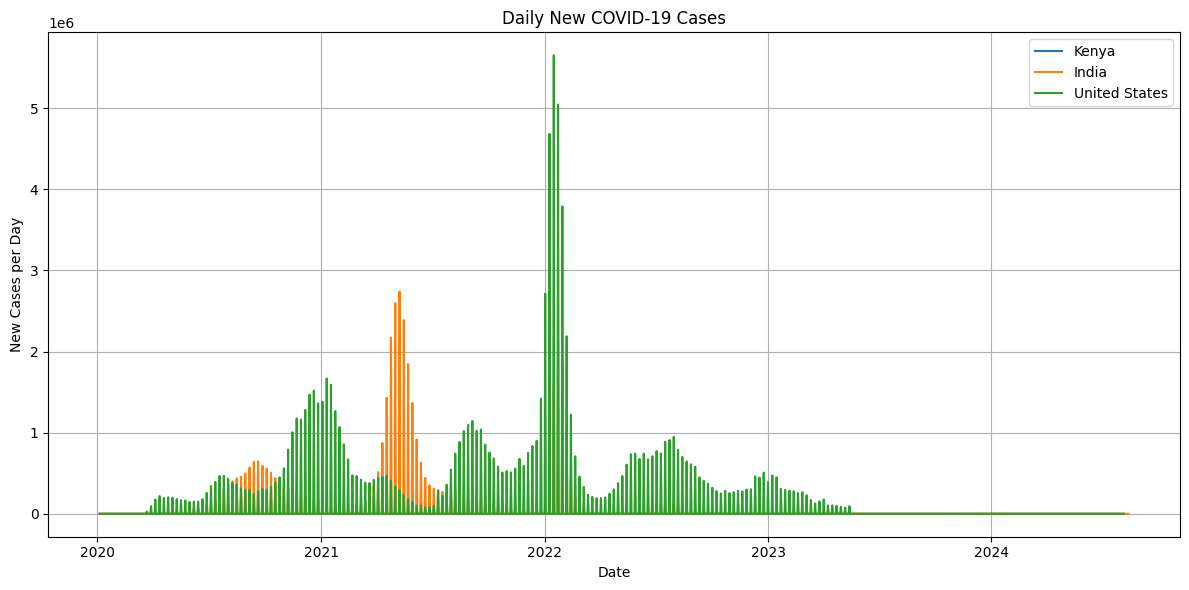

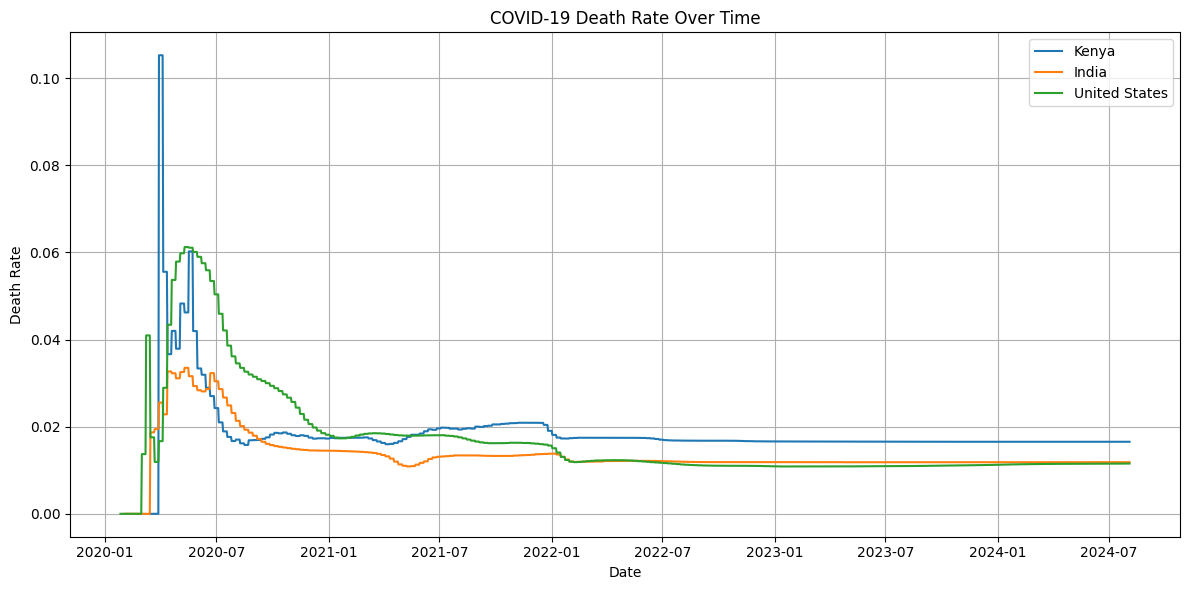

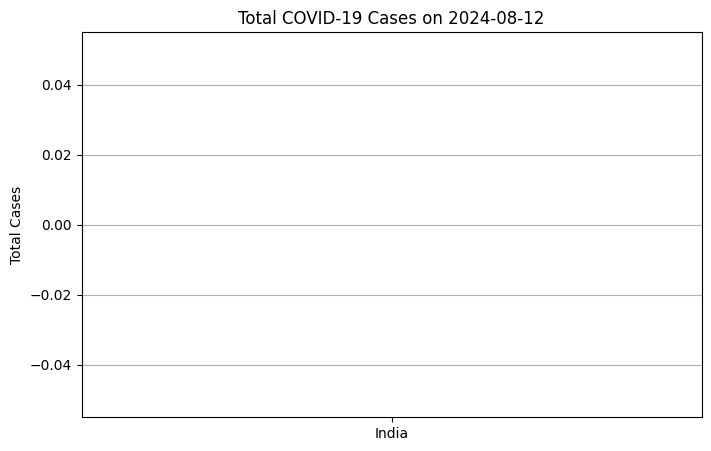

ModuleNotFoundError: No module named 'geopandas'

In [25]:
## 1. Introduction

#This project analyzes global COVID-19 data from Our World in Data to uncover trends in cases, deaths, and vaccinations. It covers data cleaning, exploration, and visualization for Kenya, India, and the United States.


%matplotlib inline


import pandas as pd

## 2. Loading the Data
# I loaded the dataset and preview the structure of the data.

# Load COVID data
df = pd.read_csv('owid-covid-data.csv')

# Display the first few rows
df.head()

df['location'].nunique()

df['location'].unique()[:20]

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Cleaning
df_countries = df[['location', 'date', 'total_cases', 'total_deaths', 'new_cases', 'total_vaccinations']].copy()

countries = ['Kenya', 'India', 'United States']
df_filtered = df_countries[df_countries['location'].isin(countries)]

df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered = df_filtered.sort_values(by=['location', 'date'])
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)

df_filtered['total_cases'] = df_filtered['total_cases'].fillna(0)

# Option 1: Fill missing values with 0 (works well for visualizations)
df_filtered.fillna(0, inplace=True)

# OR Option 2: Forward-fill (use previous day’s value)
# df_filtered.fillna(method='ffill', inplace=True)

plt.figure(figsize=(12,6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases per Day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12,6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]

plt.figure(figsize=(8,5))
plt.bar(latest_data['location'], latest_data['total_cases'])
plt.title(f'Total COVID-19 Cases on {latest_date.date()}')
plt.ylabel('Total Cases')
plt.grid(axis='y')
plt.show()

import geopandas as gpd

# Load built-in world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

import pandas as pd

# Load your COVID-19 dataset
df = pd.read_csv('owid-covid-data.csv')

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Get the latest date in the dataset
latest_date = df['date'].max()

# Filter data for the latest date
latest_data = df[df['date'] == latest_date]

# Select relevant columns
covid_data = latest_data[['location', 'total_cases']]

# Rename columns for merging
covid_data = covid_data.rename(columns={'location': 'name'})
